In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 1. 데이터셋 불러오기

In [2]:
import pandas as pd

In [3]:
!pip -q install chardet

import chardet, pandas as pd

def detect_encoding(path, sample_bytes=100_000):
    with open(path, 'rb') as f:
        raw = f.read(sample_bytes)
    guess = chardet.detect(raw) or {}
    return guess.get('encoding'), guess.get('confidence')

def safe_read_csv(path, try_encodings=('utf-8-sig','cp949','euc-kr','utf-8','latin1'), **kwargs):
    # 1) chardet로 추정
    enc, conf = detect_encoding(path)
    tried = []
    if enc:
        try:
            df = pd.read_csv(path, encoding=enc, **kwargs)
            print(f"[OK] {path}  (chardet='{enc}', conf={conf})")
            return df
        except Exception as e:
            tried.append((enc, str(e)))
            print(f"[FAIL] {path}  (chardet='{enc}', conf={conf}) -> {e}")

    # 2) 준비된 후보 인코딩들로 순차 시도
    for enc in try_encodings:
        try:
            df = pd.read_csv(path, encoding=enc, **kwargs)
            print(f"[OK] {path}  (fallback='{enc}')")
            return df
        except Exception as e:
            tried.append((enc, str(e)))

    # 3) 마지막 수단: errors='replace'로 손실 허용 로드
    try:
        df = pd.read_csv(path, encoding=enc or 'latin1', errors='replace', **kwargs)
        print(f"[OK] {path}  (force='{enc or 'latin1'}', errors='replace') -> 일부 문자 대체")
        return df
    except Exception as e:
        print(f"[ERROR] {path} 로드 실패. 시도 내역:", tried)
        raise


In [4]:
df = pd.read_csv('/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/최종 데이터셋.csv')
df2 = pd.read_csv('/content/drive/MyDrive/5학년/JBIG/2학기/서울시각화경진대회/서울시 자치구_연령대별 1인가구수.csv')

#2. 히트맵

In [5]:
df

,ㄱ,일반가구,1인가구,남자 1인가구,여성 1인가구,1인가구 비율,중증정신질환 등록회원 수,장기재원건수,노인여가복지시설,정신건강증진기관,고독사 발생 건수,복지 인프라 밀도,고독사 위험지수,1인 가구 1만명 당 고독사 위험지수,1인 가구 1만명 당 복지 인프라 밀도
0,강남구,226333,79274,34215,45059,35.025383,287,4,19,2,23,0.000265,0.029013,2.901330,2.649040
1,강동구,194369,65601,30163,35438,33.750752,149,5,4,5,52,0.000137,0.079267,7.926708,1.371930
2,강북구,130929,53705,24478,29227,41.018415,231,3,3,4,61,0.000130,0.113583,11.358347,1.303417
3,강서구,256036,106748,48113,58635,41.692574,182,8,14,8,81,0.000206,0.075880,7.587964,2.060929
4,관악구,264148,153605,81133,72472,58.151112,216,5,6,6,76,0.000078,0.049478,4.947756,0.781225
5,광진구,158609,72933,34586,38347,45.982889,171,2,6,6,41,0.000165,0.056216,5.621598,1.645346
6,구로구,171388,62632,30421,32211,36.543982,228,12,2,8,40,0.000160,0.063865,6.386512,1.596628
7,금천구,112676,53858,28311,25547,47.798999,180,6,14,3,51,0.000316,0.094693,9.469345,3.156448
8,노원구,205666,67182,28424,38758,32.665584,246,6,7,6,64,0.000194,0.095264,9.526361,1.935042
9,도봉구,129841,43347,19193,24154,33.384678,244,4,7,10,28,0.000392,0.064595,6.459501,3.921840


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


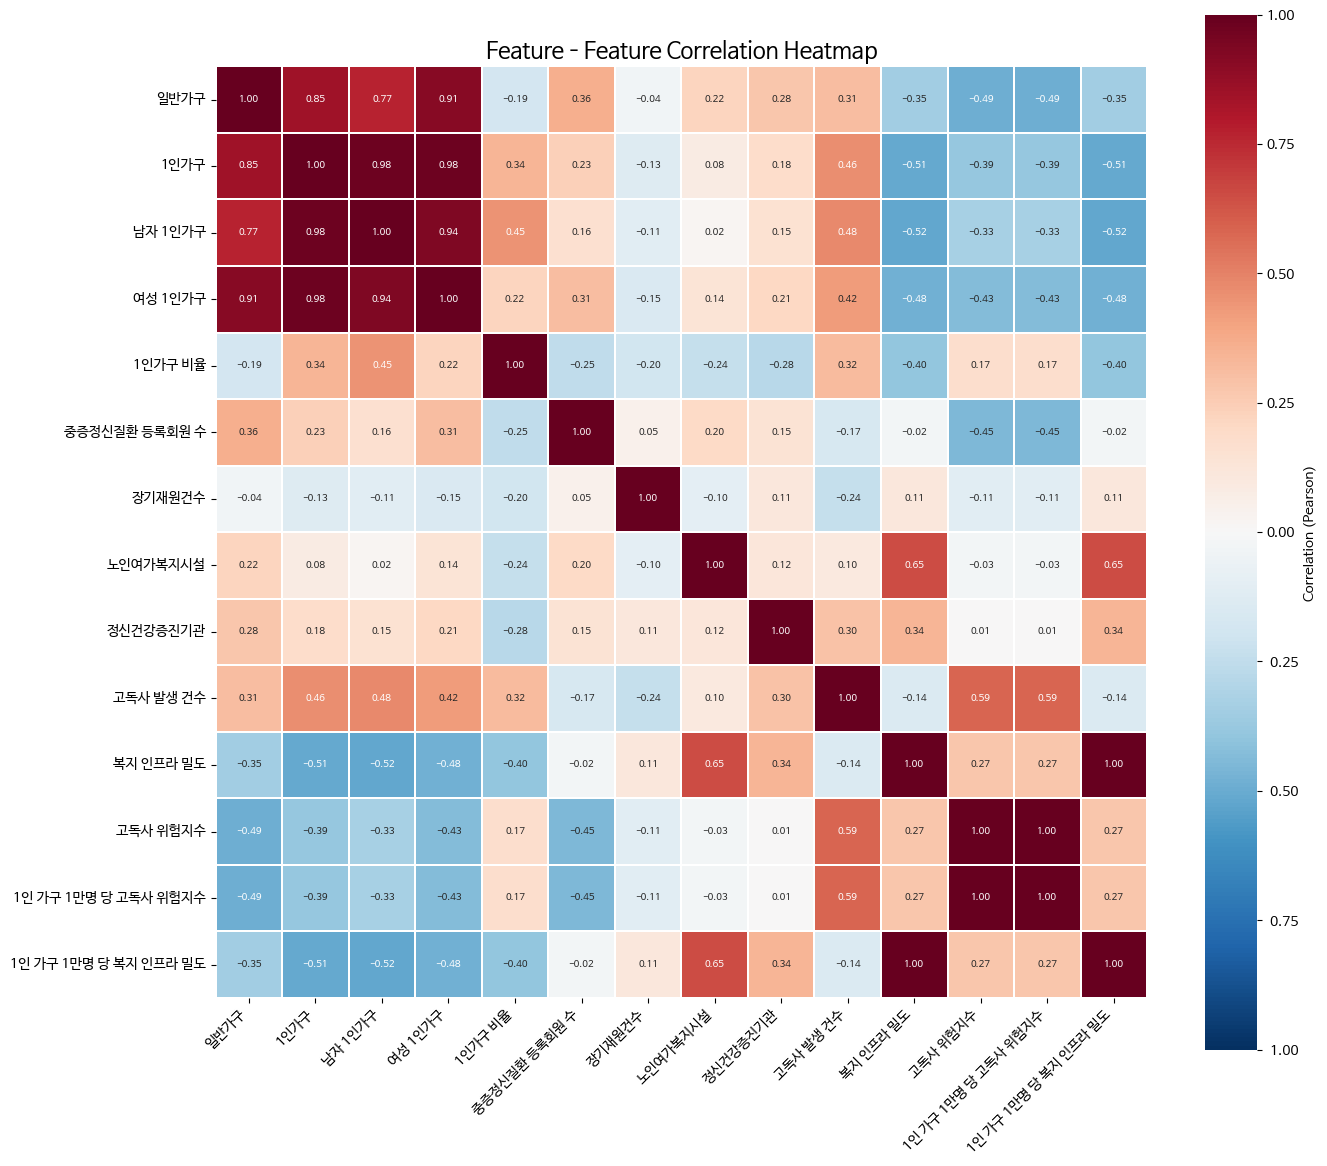

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 파일 경로
path = "/mnt/data/최종 데이터셋.csv"

# 2) 로드 (인코딩 추정)
for enc in ("utf-8-sig","utf-8","cp949","euc-kr"):
    try:
        df = pd.read_csv(path, encoding=enc)
        break
    except Exception:
        pass

# 3) 구 이름 컬럼 제거
gu_candidates = ["구","자치구명","시군구명","지역명","시군구"]
for c in gu_candidates:
    if c in df.columns:
        df = df.drop(columns=[c])
        break

# 4) 숫자 피처만 선택
num = df.select_dtypes(include="number").copy()
num = num.replace([np.inf, -np.inf], np.nan).fillna(0)

# 5) 상관행렬 계산
corr = num.corr(method='pearson')

# 6) 히트맵 그리기 (모든 칸 표시 + 수치 표시)
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap="RdBu_r",       # 파랑(-1) ↔ 흰(0) ↔ 빨강(+1)
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True, fmt=".2f",  # 수치 표시
    annot_kws={"size":7},   # 숫자 글씨 크기
    linewidths=.3,
    cbar_kws={"label": "Correlation (Pearson)"}
)
plt.title("Feature–Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


상관계수 |r| ≥ 0.5인 변수쌍:
고독사 위험지수 vs 1인 가구 1만명 당 고독사 위험지수 : r=1.00
복지 인프라 밀도 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=1.00
1인가구 vs 남자 1인가구 : r=0.98
1인가구 vs 여성 1인가구 : r=0.98
남자 1인가구 vs 여성 1인가구 : r=0.94
일반가구 vs 여성 1인가구 : r=0.91
일반가구 vs 1인가구 : r=0.85
일반가구 vs 남자 1인가구 : r=0.77
노인여가복지시설 vs 복지 인프라 밀도 : r=0.65
노인여가복지시설 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=0.65
고독사 발생 건수 vs 1인 가구 1만명 당 고독사 위험지수 : r=0.59
고독사 발생 건수 vs 고독사 위험지수 : r=0.59
남자 1인가구 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=-0.52
남자 1인가구 vs 복지 인프라 밀도 : r=-0.52
1인가구 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=-0.51
1인가구 vs 복지 인프라 밀도 : r=-0.51


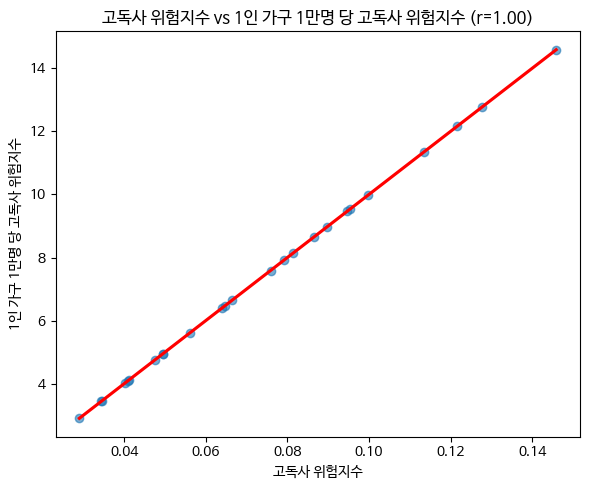

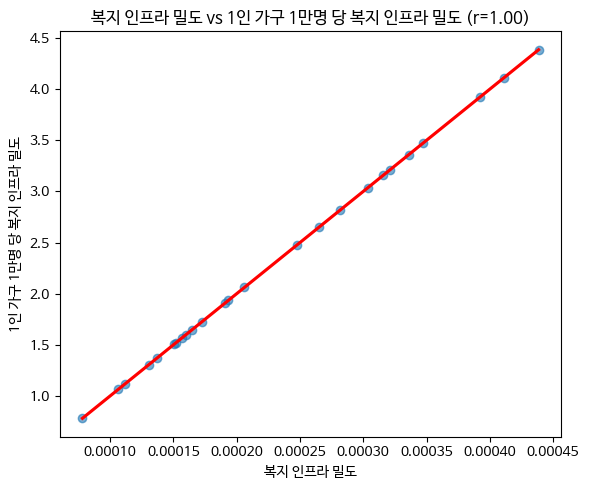

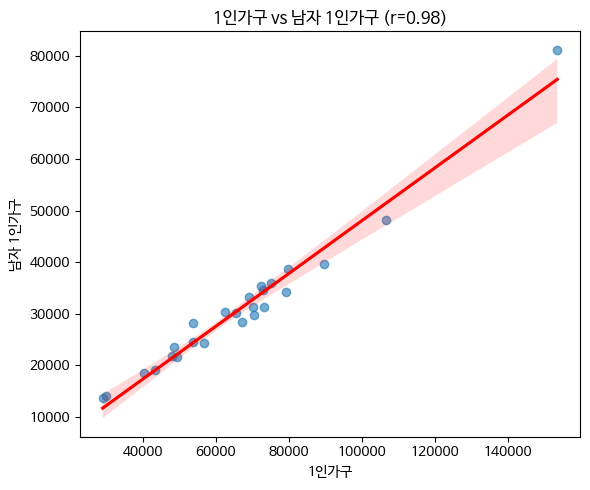

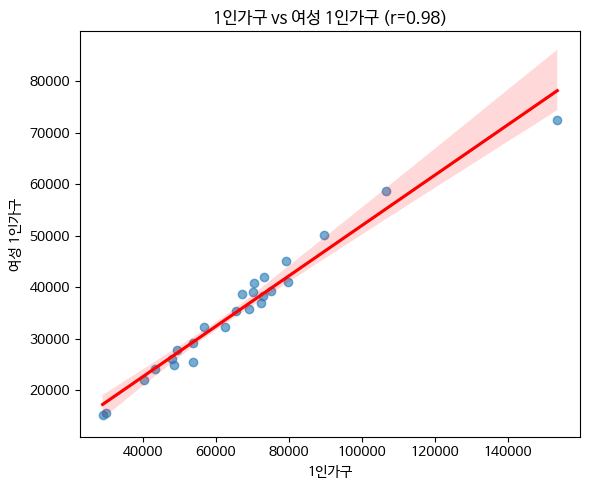

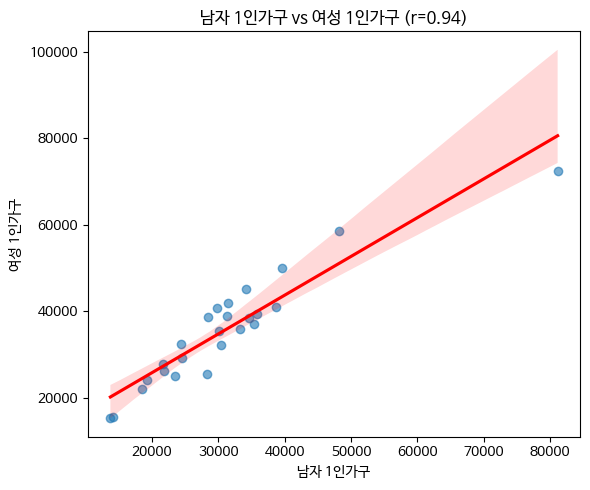

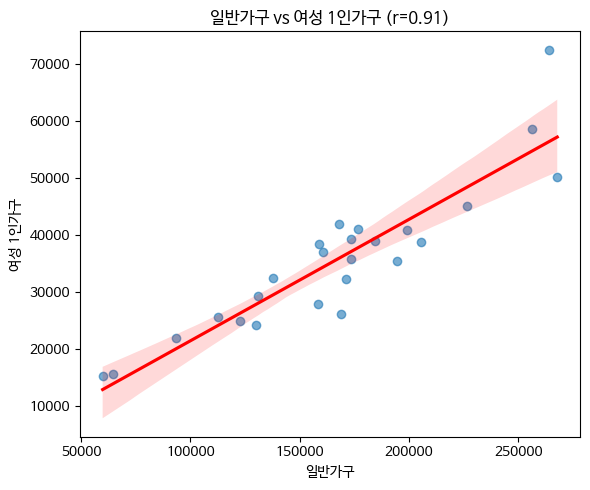

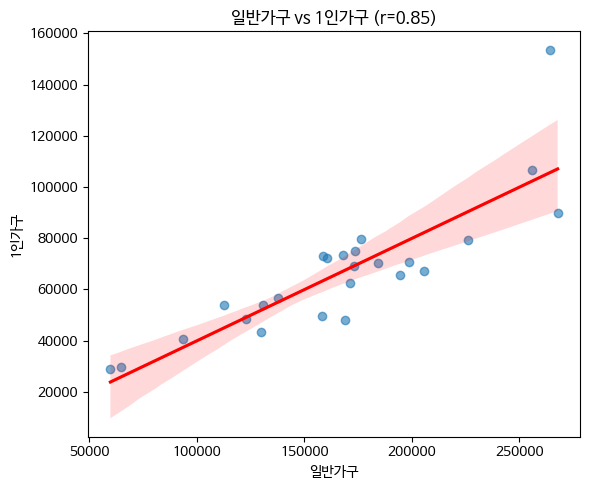

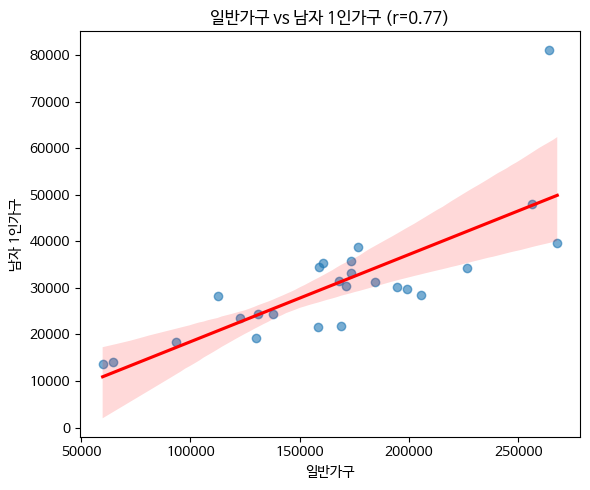

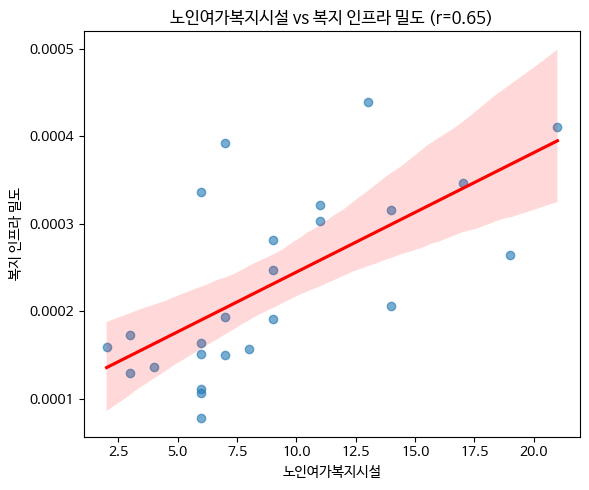

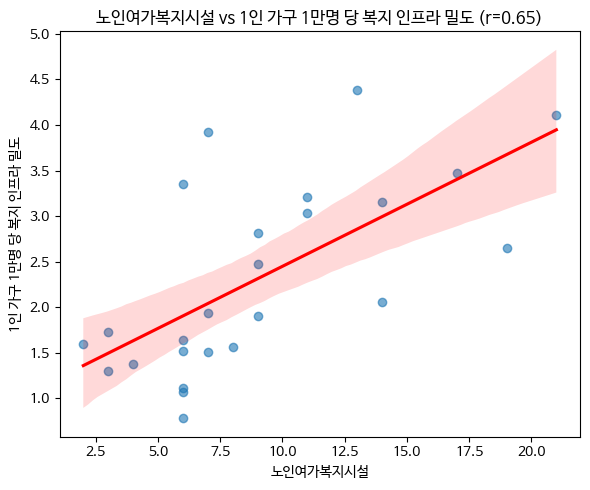

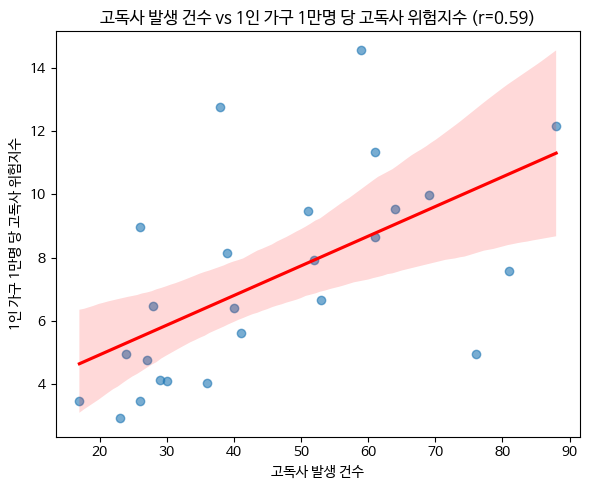

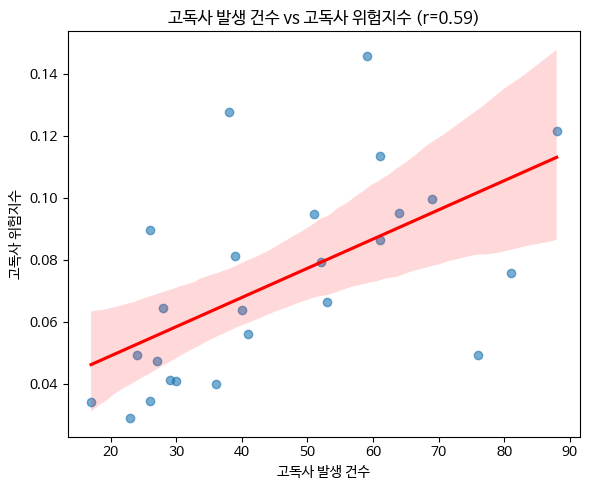

/tmp/ipython-input-916075979.py:31: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


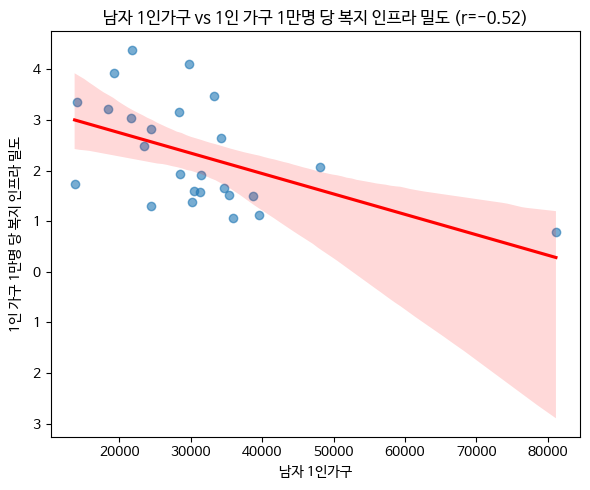

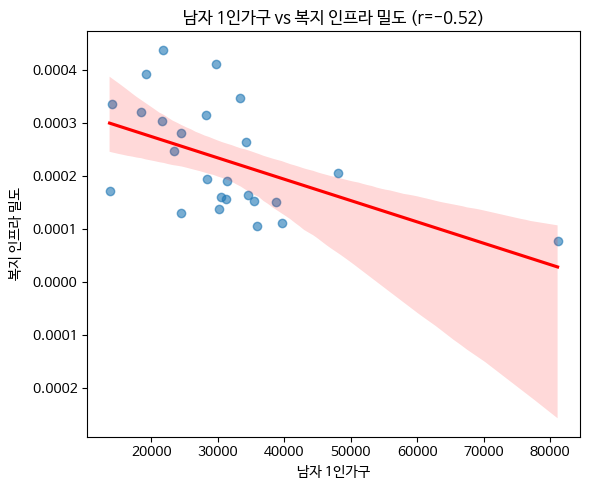

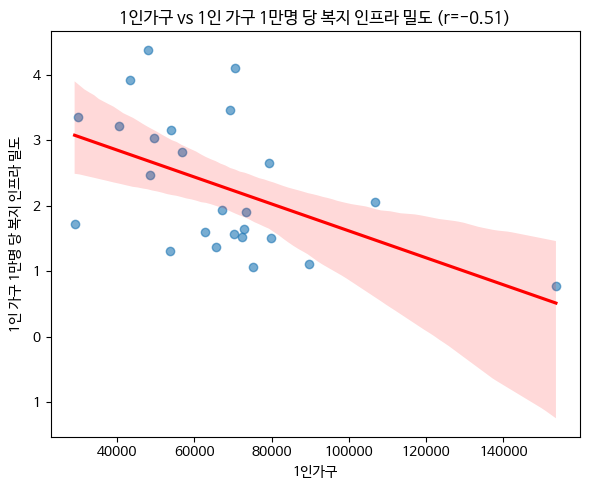

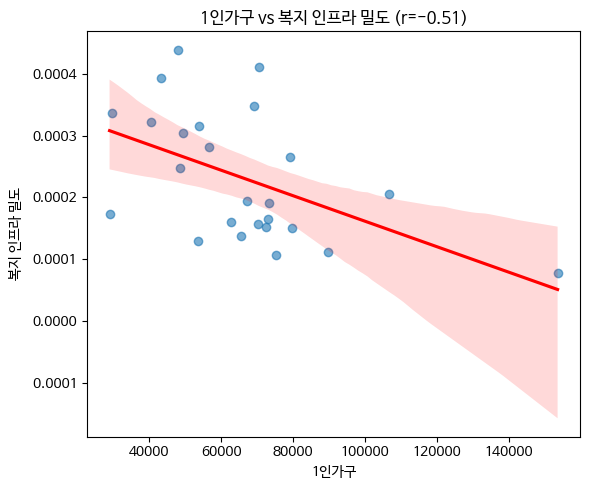

In [10]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 피어슨 상관계수 행렬
corr = num.corr(method='pearson')

# 2) 모든 피처 쌍에 대해 상관계수 추출
pairs = []
for i, j in itertools.combinations(corr.columns, 2):
    r = corr.loc[i, j]
    if abs(r) >= 0.5:   # 기준: 절대값 0.5 이상
        pairs.append((i, j, r))

# 3) 상관계수 절댓값 기준으로 정렬
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

print("상관계수 |r| ≥ 0.5인 변수쌍:")
for x, y, r in pairs_sorted:
    print(f"{x} vs {y} : r={r:.2f}")

# 4) 각 변수쌍 산점도+회귀선 그리기
for x, y, r in pairs_sorted:
    plt.figure(figsize=(6,5))
    sns.regplot(
        data=num, x=x, y=y,
        scatter_kws={'alpha':0.6},
        line_kws={'color':'red'}
    )
    plt.title(f"{x} vs {y} (r={r:.2f})")
    plt.tight_layout()
    plt.show()


상관계수 |r| ≥ 0.5인 변수쌍:
고독사 위험지수 vs 1인 가구 1만명 당 고독사 위험지수 : r=1.00
복지 인프라 밀도 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=1.00
1인가구 vs 남자 1인가구 : r=0.98
1인가구 vs 여성 1인가구 : r=0.98
남자 1인가구 vs 여성 1인가구 : r=0.94
일반가구 vs 여성 1인가구 : r=0.91
일반가구 vs 1인가구 : r=0.85
일반가구 vs 남자 1인가구 : r=0.77
노인여가복지시설 vs 복지 인프라 밀도 : r=0.65
노인여가복지시설 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=0.65
고독사 발생 건수 vs 1인 가구 1만명 당 고독사 위험지수 : r=0.59
고독사 발생 건수 vs 고독사 위험지수 : r=0.59
남자 1인가구 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=-0.52
남자 1인가구 vs 복지 인프라 밀도 : r=-0.52
1인가구 vs 1인 가구 1만명 당 복지 인프라 밀도 : r=-0.51
1인가구 vs 복지 인프라 밀도 : r=-0.51


/tmp/ipython-input-1440416679.py:46: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()


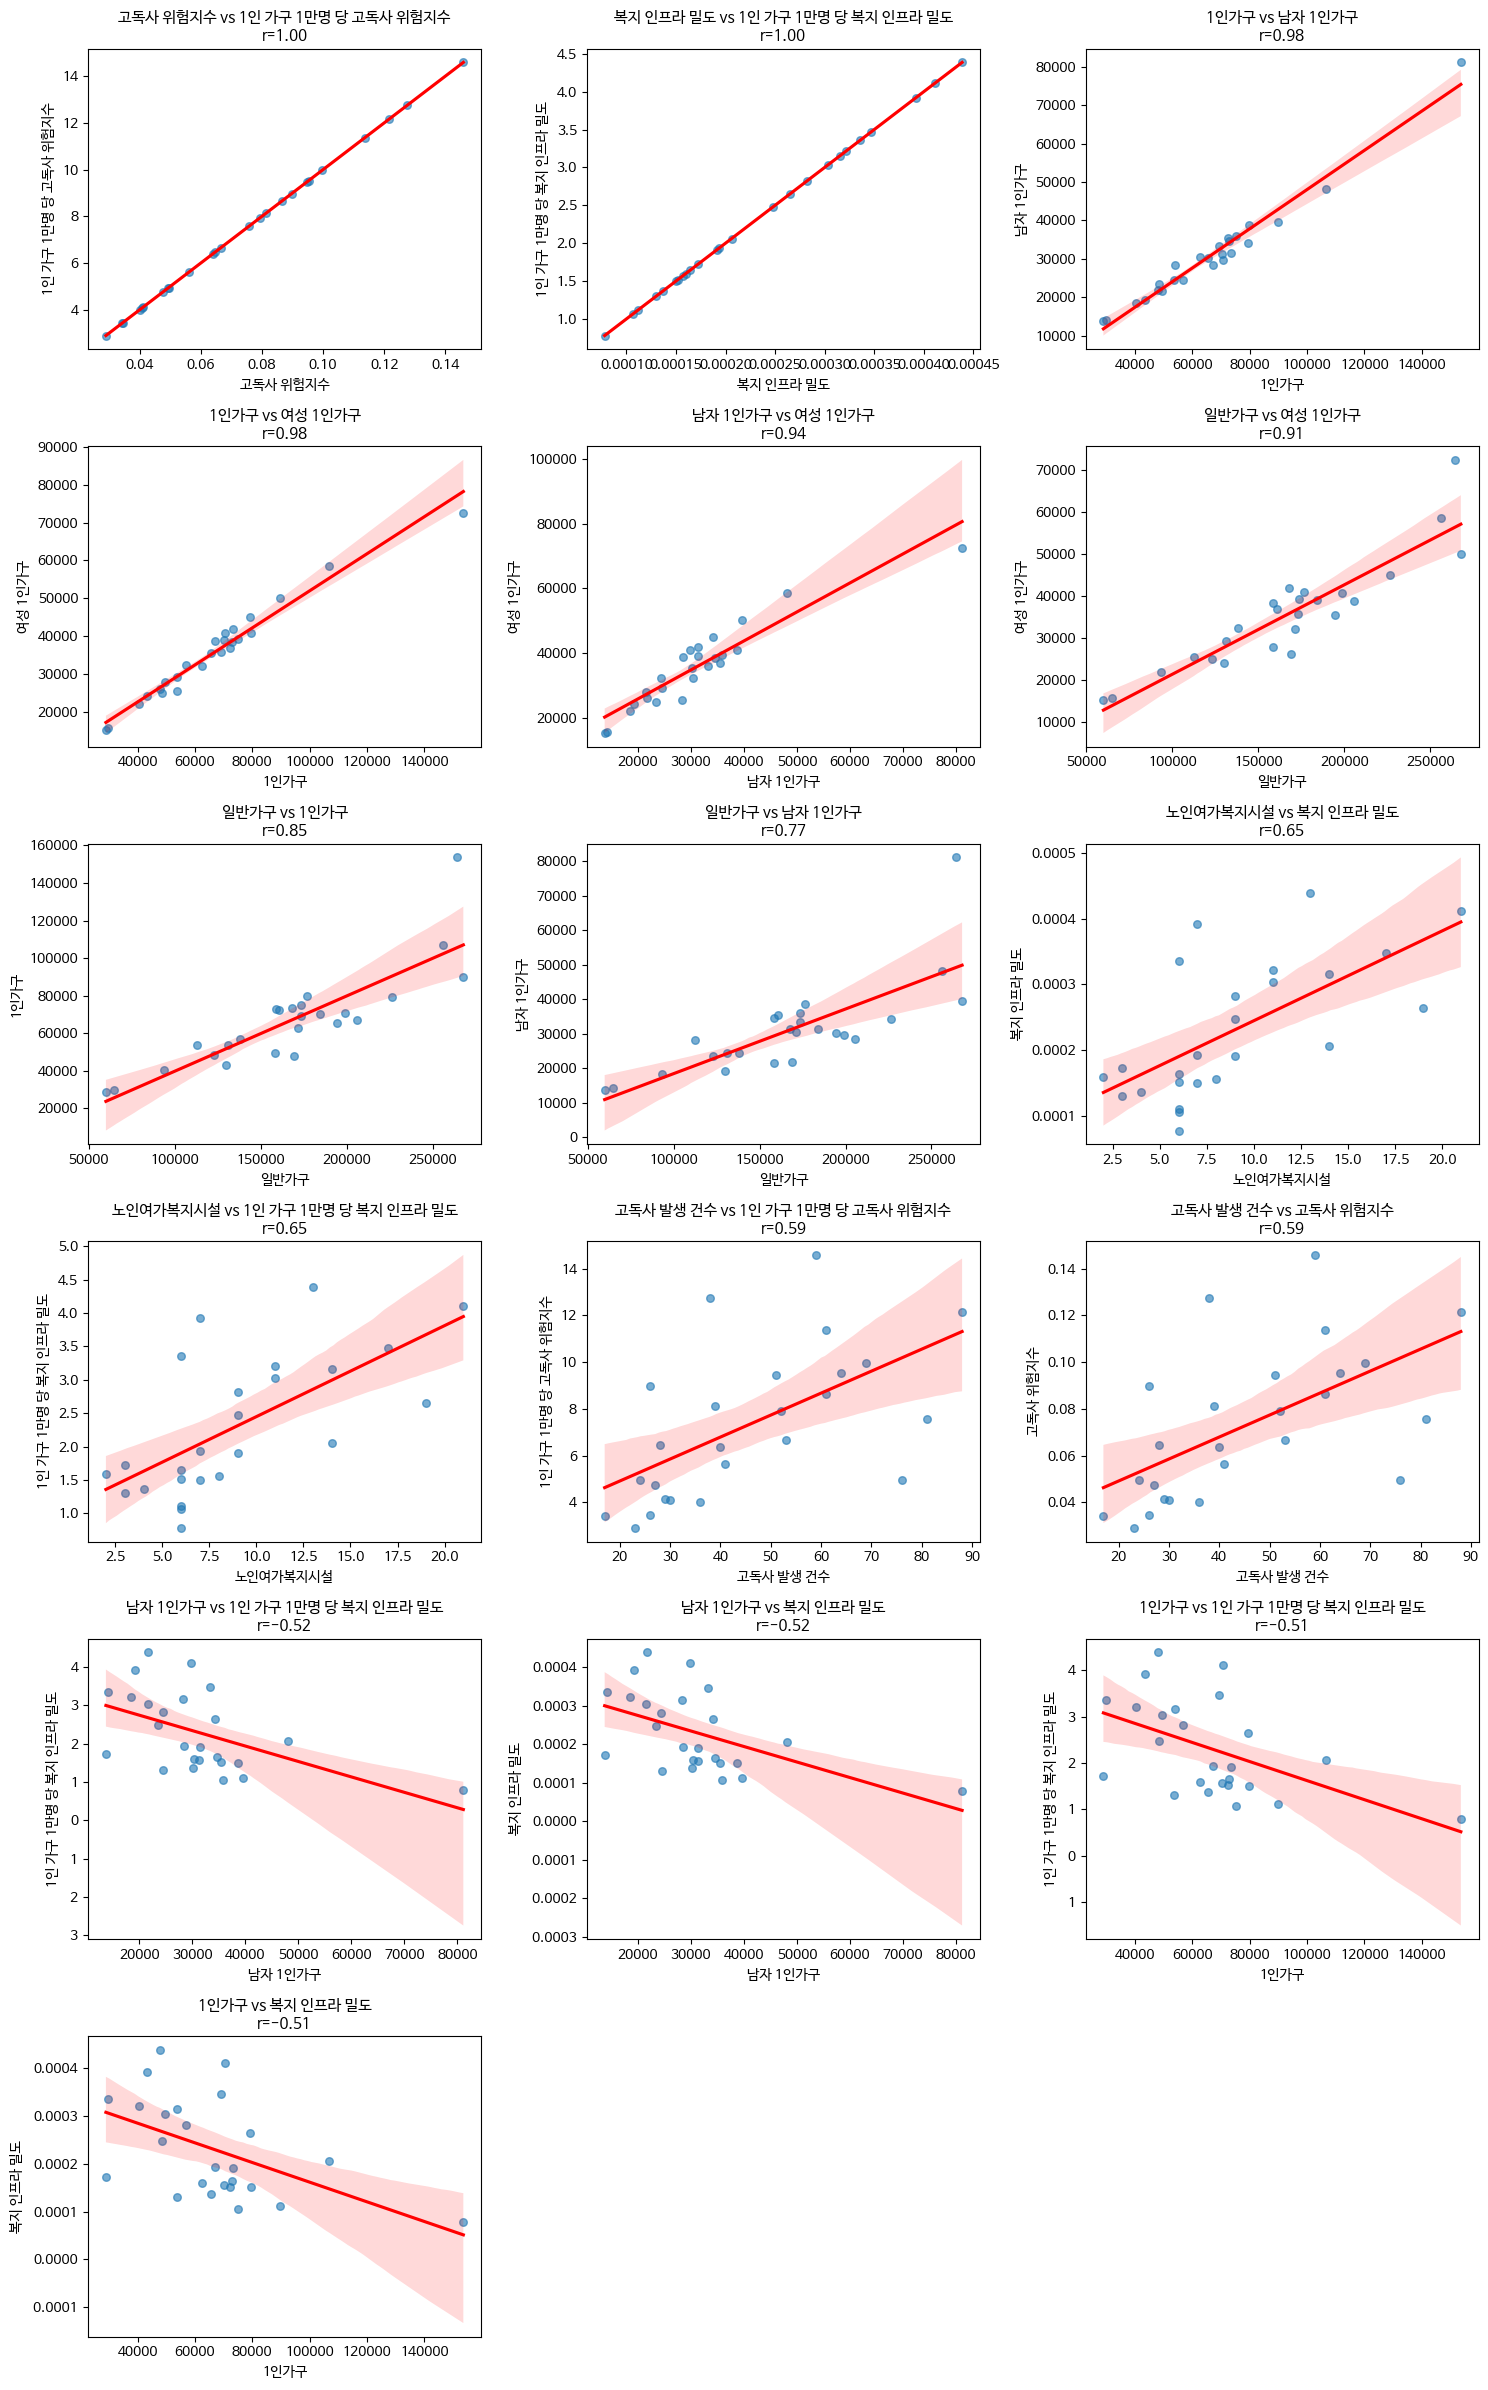

In [11]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import math

# 1) 피어슨 상관계수 행렬
corr = num.corr(method='pearson')

# 2) |r| ≥ 0.5 인 변수쌍만 추출
pairs = []
for i, j in itertools.combinations(corr.columns, 2):
    r = corr.loc[i, j]
    if abs(r) >= 0.5:
        pairs.append((i, j, r))

# 3) 정렬 (절대값 기준)
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

print("상관계수 |r| ≥ 0.5인 변수쌍:")
for x, y, r in pairs_sorted:
    print(f"{x} vs {y} : r={r:.2f}")

# 4) 서브플롯 크기 계산
n = len(pairs_sorted)
cols = 3   # 한 행에 몇 개 배치할지 (3 추천)
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axes = axes.flatten()

# 5) 각 변수쌍 그리기
for idx, (x, y, r) in enumerate(pairs_sorted):
    ax = axes[idx]
    sns.regplot(
        data=num, x=x, y=y,
        scatter_kws={'alpha':0.6, 's':30},
        line_kws={'color':'red'},
        ax=ax
    )
    ax.set_title(f"{x} vs {y}\nr={r:.2f}", fontsize=11)

# 6) 남는 subplot 숨기기
for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


#3. 시각화

In [12]:
# 예시: 터미널에서 아래 명령 실행
!git clone https://github.com/southkorea/seoul-maps.git


fatal: destination path 'seoul-maps' already exists and is not an empty directory.


In [14]:
pip install geopandas

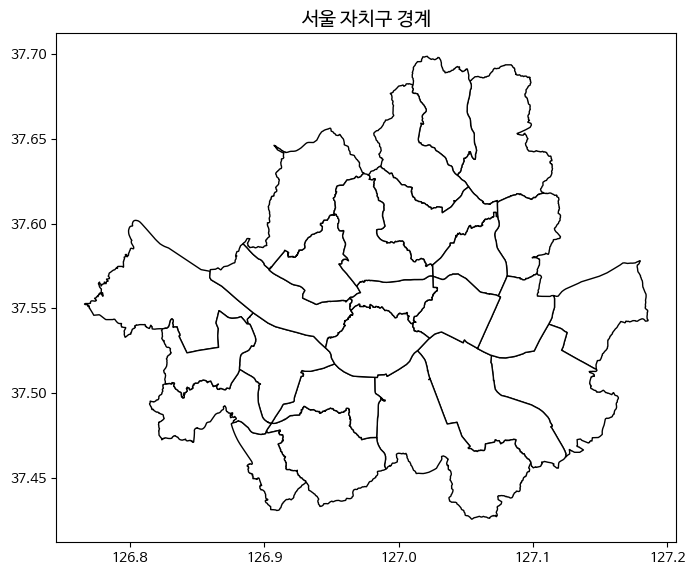

In [18]:
import matplotlib.pyplot as plt

# 좌표계 정보 없으면 강제로 지정
if seoul_gu.crs is None:
    seoul_gu = seoul_gu.set_crs("EPSG:4326")

# 단순 경계 그리기
seoul_gu.plot(edgecolor="black", facecolor="white", figsize=(8,8))
plt.title("서울 자치구 경계", fontsize=14)
plt.show()


geopandas 이용

In [21]:
df

,ㄱ,일반가구,1인가구,남자 1인가구,여성 1인가구,1인가구 비율,중증정신질환 등록회원 수,장기재원건수,노인여가복지시설,정신건강증진기관,고독사 발생 건수,복지 인프라 밀도,고독사 위험지수,1인 가구 1만명 당 고독사 위험지수,1인 가구 1만명 당 복지 인프라 밀도
0,강남구,226333,79274,34215,45059,35.025383,287,4,19,2,23,0.000265,0.029013,2.901330,2.649040
1,강동구,194369,65601,30163,35438,33.750752,149,5,4,5,52,0.000137,0.079267,7.926708,1.371930
2,강북구,130929,53705,24478,29227,41.018415,231,3,3,4,61,0.000130,0.113583,11.358347,1.303417
3,강서구,256036,106748,48113,58635,41.692574,182,8,14,8,81,0.000206,0.075880,7.587964,2.060929
4,관악구,264148,153605,81133,72472,58.151112,216,5,6,6,76,0.000078,0.049478,4.947756,0.781225
5,광진구,158609,72933,34586,38347,45.982889,171,2,6,6,41,0.000165,0.056216,5.621598,1.645346
6,구로구,171388,62632,30421,32211,36.543982,228,12,2,8,40,0.000160,0.063865,6.386512,1.596628
7,금천구,112676,53858,28311,25547,47.798999,180,6,14,3,51,0.000316,0.094693,9.469345,3.156448
8,노원구,205666,67182,28424,38758,32.665584,246,6,7,6,64,0.000194,0.095264,9.526361,1.935042
9,도봉구,129841,43347,19193,24154,33.384678,244,4,7,10,28,0.000392,0.064595,6.459501,3.921840
